In [1]:
import numpy as np
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

def read_timings():
    tdict = {}
    tsumdict = {}
    with open("timings.dat", "r") as f:
        lines = f.readlines()
        names = []
        vals = []
        for line in  lines:
            toks = line.split()
            tdict[toks[0]] = float(toks[1])
            tsumdict[toks[0]] = float(toks[2])
    return tdict,tsumdict



In [2]:
df_per_result = pd.DataFrame()
df_total_time = pd.DataFrame()
xval = [1024 ,2048,4096,8192,16384,32768,65536] 

for v in xval:
    subprocess.call("python generate_coords.py {}".format(v), shell=True)
    subprocess.call("./build/timings data.txt 100000", shell=True)
    tdict_v, tsumdict_v = read_timings()
    df_per_result = df_per_result.append(tdict_v,ignore_index=True)
    df_total_time = df_total_time.append(tsumdict_v,ignore_index=True)
    subprocess.call("rm timings.dat", shell=True)

In [3]:
index = {}
names = list(tdict_v.keys())
for i in range(len(xval)):
    index[i] = xval[i]

df_per_result = df_per_result.rename(index=index)
print(df_per_result)
df_total_time = df_total_time.rename(index=index)
print(df_per_result)
index

                FMA           MDA           MDT          NINT       Vanilla  \
1024   1.375010e-09  1.117770e-08  8.806460e-09  1.346570e-09  1.096600e-08   
2048   1.208980e-09  1.009760e-08  8.123590e-09  1.225010e-09  1.006990e-08   
4096   1.226140e-09  1.017290e-08  8.325350e-09  1.233220e-09  1.019140e-08   
8192   1.362200e-09  1.123880e-08  9.085720e-09  1.341240e-09  1.128680e-08   
16384  3.786660e-09  2.672760e-08  2.179450e-08  3.608560e-09  2.685890e-08   
32768  4.114730e-09  2.837760e-08  2.253990e-08  4.036930e-09  2.756750e-08   
65536  1.856090e-09  1.461770e-08  1.175590e-08  1.912260e-09  1.444000e-08   

                XMM  
1024   1.956370e-09  
2048   1.758530e-09  
4096   1.762930e-09  
8192   1.945370e-09  
16384  4.999040e-09  
32768  5.659490e-09  
65536  2.691440e-09  
                FMA           MDA           MDT          NINT       Vanilla  \
1024   1.375010e-09  1.117770e-08  8.806460e-09  1.346570e-09  1.096600e-08   
2048   1.208980e-09  1.009760e-08

{0: 1024, 1: 2048, 2: 4096, 3: 8192, 4: 16384, 5: 32768, 6: 65536}

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

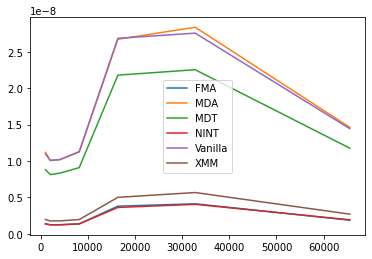

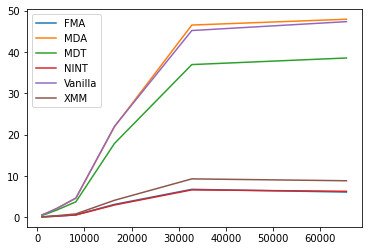

In [4]:
plt.figure()
df_per_result.plot()
df_total_time.plot()
